In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import  DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import neighbors
from math import sqrt

In [2]:
df = pd.read_csv('houses_train.csv')
df2 = pd.read_csv('houses_train.csv')
df.head(5)

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,5546,130000.0,newly repaired,Center,4,Sayat Nova Ave,3,Yerevan,96.0,http://www.myrealty.am/en/item/28244/3-senyaka...,1,stone,3,3.2
1,2979,65000.0,good,Arabkir,5,Hr.Kochar St,3,Yerevan,78.0,http://www.myrealty.am/en/item/18029/3-senyaka...,1,stone,2,2.8
2,2698,129000.0,good,Center,10,M.Khorenatsi St,3,Yerevan,90.0,http://www.myrealty.am/en/item/37797/3-senyaka...,1,panel,3,2.8
3,4548,52000.0,newly repaired,Center,14,Argishti St,2,Yerevan,53.0,http://www.myrealty.am/en/item/36153/2-senyaka...,1,monolit,5,3.0
4,2982,65000.0,newly repaired,Center,12,Mashtots Ave,2,Yerevan,47.0,http://www.myrealty.am/en/item/17566/2-senyaka...,1,panel,3,2.8


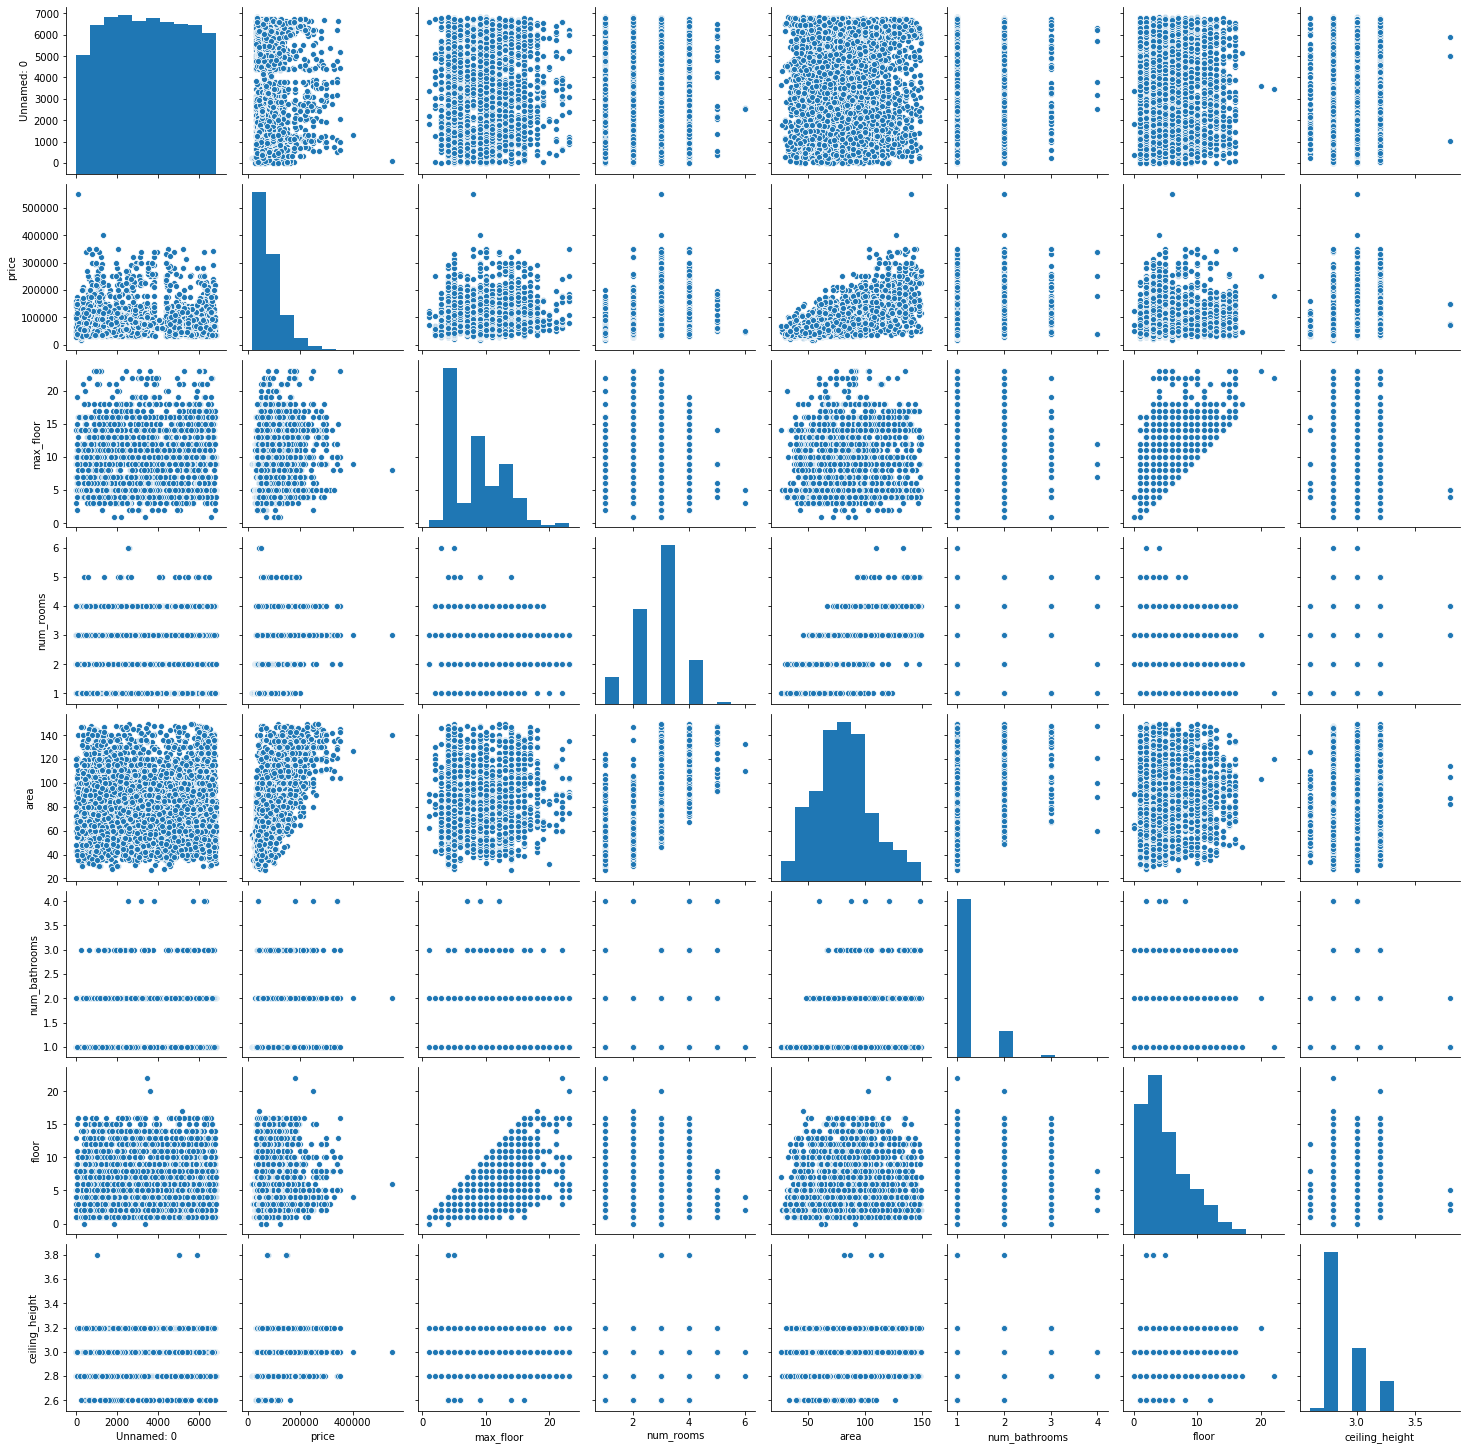

In [3]:
sns.pairplot(df)

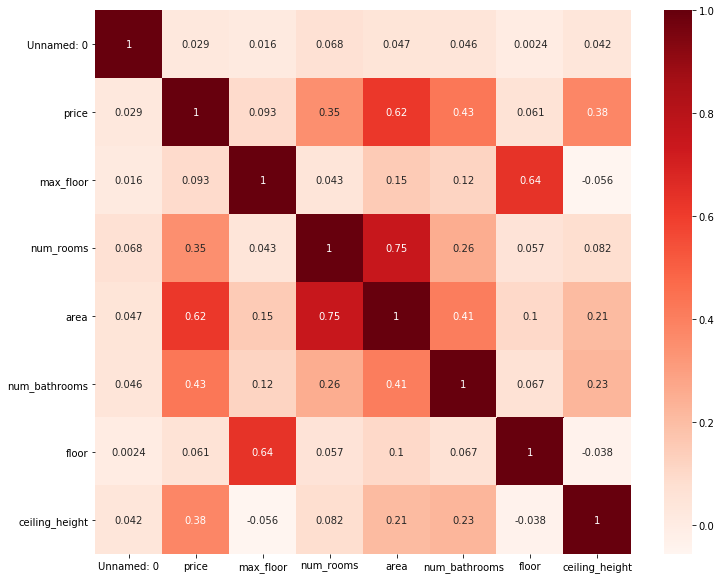

In [4]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
df = df.drop(columns = ['Unnamed: 0', 'url', 'region',  'max_floor', 'floor','num_rooms','num_bathrooms'])
df

,price,condition,district,street,area,building_type,ceiling_height
0,130000.0,newly repaired,Center,Sayat Nova Ave,96.0,stone,3.2
1,65000.0,good,Arabkir,Hr.Kochar St,78.0,stone,2.8
2,129000.0,good,Center,M.Khorenatsi St,90.0,panel,2.8
3,52000.0,newly repaired,Center,Argishti St,53.0,monolit,3.0
4,65000.0,newly repaired,Center,Mashtots Ave,47.0,panel,2.8
...,...,...,...,...,...,...,...
4995,56000.0,good,Davtashen,Davtashen 3 district,100.0,panel,2.8
4996,115000.0,good,Arabkir,Adonts St,135.0,stone,2.8
4997,127000.0,newly repaired,Center,Yekmalyan St,73.0,monolit,3.0
4998,41800.0,good,Center,D. Demirchyan St,48.0,stone,2.8


In [6]:
df = pd.get_dummies(data=df, columns=['street', 'condition', 'building_type', 'district'])
df

,price,area,ceiling_height,street_ Z. Kanaqertsi,street_16 District,street_16 District 1 chain,street_17 District,street_A. Avetisyan St,street_A. Babajanyan St,street_A. Hovhannisyan St,...,district_Center,district_Davtashen,district_Erebuni,district_Malatia-Sebastia,district_Nor Norq,district_Norq Marash,district_Nubarashen,district_Qanaqer-Zeytun,district_Shengavit,district_Vahagni district
0,130000.0,96.0,3.2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,65000.0,78.0,2.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,129000.0,90.0,2.8,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,52000.0,53.0,3.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,65000.0,47.0,2.8,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,56000.0,100.0,2.8,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4996,115000.0,135.0,2.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,127000.0,73.0,3.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4998,41800.0,48.0,2.8,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
X = df.loc[:, df.columns != 'price'].to_numpy()
y = df["price"].to_numpy()

In [8]:
X.reshape(-1,1)
y.reshape(-1,1)
X.shape

(5000, 358)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=40)
X_train.shape

(4000, 358)

## Linear Regression

In [10]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv)
print(-np.mean(scores))

22735384015667.938


## Random Forest Regression 

In [11]:
forest_reg = RandomForestRegressor(random_state = 1)

params = {
    "n_estimators": np.arange(1,20),
    "max_features": np.arange(1,20)
}

forest_reg_cv = GridSearchCV(forest_reg, params, cv = 3, scoring = "neg_root_mean_squared_error")
forest_reg_cv.fit(X_train, y_train)

print("Best score:", -forest_reg_cv.best_score_)
print("Best parameter:", forest_reg_cv.best_params_)

Best score: 24171.66302119158
Best parameter: {'max_features': 10, 'n_estimators': 19}


In [12]:
forest_reg = RandomForestRegressor(random_state = 1, n_estimators=19 , max_features=10)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_features=10, n_estimators=19, random_state=1)

In [13]:
y_pred = forest_reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

21985.257933054734

## Decision Tree Regression

In [14]:
tree_reg = DecisionTreeRegressor(random_state = 1)

params = {
    "max_leaf_nodes": np.arange(1,50)
}

tree_reg_cv = GridSearchCV(tree_reg, params, cv = 3, scoring = "neg_root_mean_squared_error")
tree_reg_cv.fit(X_train, y_train)

print("Best score:", -tree_reg_cv.best_score_)
print("Best parameter:", tree_reg_cv.best_params_)

C:\Users\aveha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aveha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aveha\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1251, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\aveha\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 294, in fit
    "or larger than 1").format(max_leaf_nodes))
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\aveha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trac

Best score: 28811.122044919233
Best parameter: {'max_leaf_nodes': 41}


C:\Users\aveha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [            nan -43015.65711326 -39567.16834375 -37152.22243162
 -35187.6820318  -34414.5243465  -33573.01509036 -32874.74256156
 -32474.0985179  -31847.79172357 -31346.39679146 -30980.16924077
 -30884.1032243  -30564.51990257 -30295.26830841 -29881.95659301
 -30036.46980622 -29895.50667267 -29743.85376458 -29705.746283
 -29646.52870927 -29521.46807838 -29724.49896227 -29607.8235686
 -29583.38192801 -29499.27549112 -29413.92249919 -29324.73056552
 -29305.41376892 -29209.3374699  -29153.02709103 -29010.6443631
 -29044.01515139 -29089.28973862 -29057.02384355 -28936.17214292
 -28919.98990275 -28949.21877004 -28962.22387135 -28977.60452006
 -28811.12204492 -28863.53571385 -28944.27918501 -28887.95313616
 -29029.73706414 -28916.187408   -28908.3928647  -28906.79140214
 -28938.20730735]
  category=UserWarning


In [15]:
tree_reg = DecisionTreeRegressor(random_state = 1,max_leaf_nodes= 41)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

27054.810743264577

## Ridge Regression

In [16]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)

In [17]:
ridge = Ridge(random_state = 1)

params = {
    "alpha": np.arange(0,5,0.2)
}

ridge_reg_cv = GridSearchCV(ridge, params, cv = 3, scoring = "neg_root_mean_squared_error")
ridge_reg_cv.fit(X_train, y_train)

print("Best score:", -ridge_reg_cv.best_score_)
print("Best parameter:", ridge_reg_cv.best_params_)

Best score: 24474.392084302937
Best parameter: {'alpha': 1.2000000000000002}


In [18]:
ridge = Ridge(random_state = 1, alpha=1.2000000000000002)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

23540.164255116542

## Final model and method

In [19]:
forest_reg = RandomForestRegressor(random_state = 1, n_estimators=19 , max_features=10)
forest_reg.fit(X, y)

RandomForestRegressor(max_features=10, n_estimators=19, random_state=1)

In [20]:
def final_model(test_df):
    
    temp = pd.concat([df2,test_df], keys=[0,1])
    temp = temp.drop(columns = ['Unnamed: 0', 'url', 'region',  'max_floor', 'floor','num_rooms','num_bathrooms'])

    temp = pd.get_dummies(data=temp, columns=[ 'condition', 'building_type', 'street', 'district'])
    
    test_df = temp.xs(1)
    
    for col_name in test_df.columns:
        found = False
        for col2_name in df.columns:
            if(col_name == col2_name):
                found = True
        if(found == False):
            test_df = test_df.drop(columns = [col_name])
    
    X_test = test_df.loc[:, df.columns != 'price'].to_numpy()
    y_test = test_df["price"].to_numpy()
    X_test.reshape(-1,1)
    y_test.reshape(-1,1)
    
    
    pred=forest_reg.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) 
    print("Mean squared error is " + str(error))


In [21]:
##test_df = pd.read_csv("test csv file")

In [22]:
##final_model(test_df)